In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('crop_yield.csv')

In [16]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crop                    19689 non-null  object 
 1   Crop_Year               19689 non-null  int64  
 2   Season                  19689 non-null  object 
 3   State                   19689 non-null  object 
 4   Area                    19689 non-null  float64
 5   Production              19689 non-null  int64  
 6   Annual_Rainfall         19689 non-null  float64
 7   Fertilizer              19689 non-null  float64
 8   Pesticide               19689 non-null  float64
 9   Yield                   19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [18]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


/var/folders/mj/dts7xg6d45n2326v5kk_l40w0000gn/T/ipykernel_50915/406967335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,)


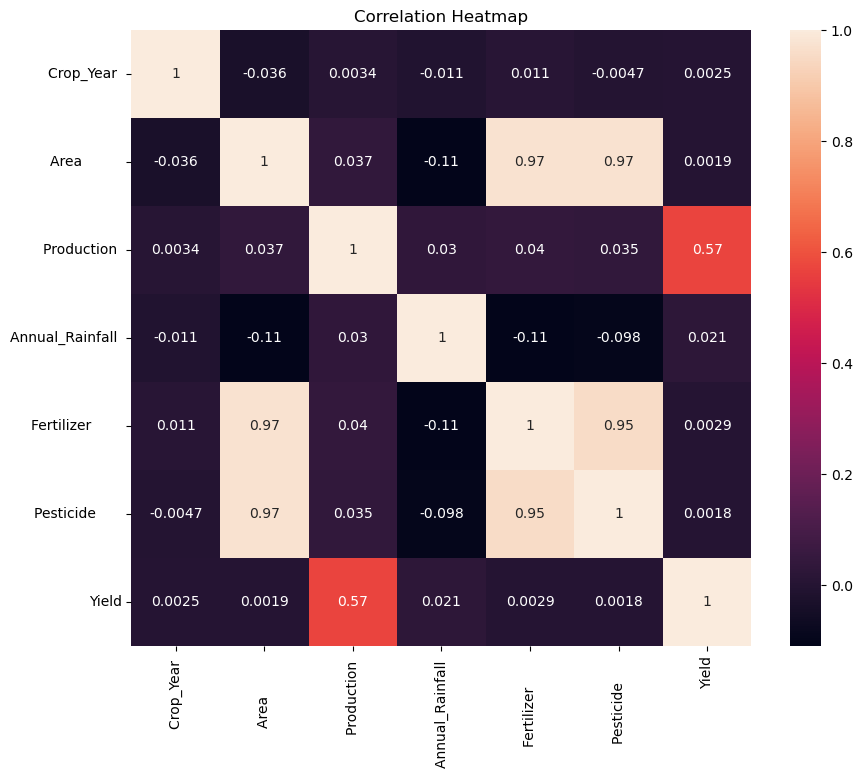

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
print(df.isnull().sum())
df = df.dropna()

Crop                      0
Crop_Year                 0
Season                    0
State                     0
Area                      0
Production                0
Annual_Rainfall           0
Fertilizer                0
Pesticide                 0
Yield                     0
dtype: int64


In [22]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['Crop                  ', 'Crop_Year ', 'Season     ',
       'State             ', 'Area         ', 'Production ',
       'Annual_Rainfall ', 'Fertilizer       ', 'Pesticide      ', 'Yield'],
      dtype='object')


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
categories = ['Crop', 'Season', 'State']

ohe = OneHotEncoder(drop='first', sparse=False)
df_encoded = ohe.fit_transform(df[categories])

encoded_categorical_df = pd.DataFrame(df_encoded, columns=ohe.get_feature_names_out(categories))

df = df.drop(columns=categories)
df = pd.concat([df.reset_index(drop=True), encoded_categorical_df], axis=1)

df.head() 

/Users/premmalviya/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [27]:
# Standardize numerical columns
numeric_data = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

sc = StandardScaler()
df[numeric_data] = sc.fit_transform(df[numeric_data])

df[numeric_data].head() # Check standardized numerical data


,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
0,-0.144802,-0.062267,0.751197,-0.179880,-0.121745
1,-0.236473,-0.062464,0.751197,-0.247217,-0.219385
2,-0.244443,-0.062482,0.751197,-0.253072,-0.227875
3,-0.218707,0.419954,0.751197,-0.234167,-0.200462
4,-0.243157,-0.062479,0.751197,-0.252127,-0.226504


In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Yield')
y = df['Yield']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(15751, 94)

In [34]:
X_test.shape

(3938, 94)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 10192.69675249617
R-Squared: 0.9872788447019367
